# Data set Context

The binary classification goal of this Dataset is to predict if the client will subscribe a bank term deposit (variable y).

- Number of Instances: 41188 

- Number of Attributes: 20 + output attribute.

- Attribute Details:

1 - age (numeric)   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed", "services","student","technician", "unemployed","unknown")   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")   
   5 - default: has credit in default? (categorical: "no","yes","unknown")   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
**related with the last contact of the current campaign:** 

   8 - contact: contact communication type (categorical: "cellular","telephone")   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - duration: last contact duration,in seconds (numeric).**Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.**
  
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   
**social and economic context attributes**  
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
  20 - nr.employed: number of employees - quarterly indicator (numeric)
  
  Output variable (desired target):  
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

- Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


# Task  : 
In this project we investigate the relationship between Client's choice to subscribe for a Term Deposit and Mulitple Features. Also we **predict if Client Subscribed a Term Deposit or not based on multiple features**.

# Imorting All Required Packages or Modules

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from sklearn.feature_selection import chi2

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from id3 import Id3Estimator
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

import warnings
warnings.filterwarnings('ignore')

# Function to Import Data

In [20]:
def Import_data(): 
    print("--------------- Pandas package is used to read the Dataset ---------------")
    Data = pd .read_csv( "C:\\Users\\SS\\Downloads\\MDS Course files\\Projects\\Data Sets\\bank-additional Class\\bank-additional-full.csv" ,sep=';')
      
    # Size of the Dataset
    print(f"Number of rows are {Data.shape[0]}. \nNumber of Columns are {Data.shape[1]}.")
    return Data 


# Function to display Basic Information of Dataset

In [21]:
def Data_info(Data):
    print(f"\n\n---------------- Information about columns of Dataset ----------------\n")
    print(Data.info())
    print(f"\n---------------- Statistical Information of the Data set ----------------\n")
    print(Data.describe())
    print()
    print("---------------- Now we check Null Values in each columns ----------------\n")
    print(Data.isnull().sum())
    

# Functions to separate features into Continous and Categorical features 

In [22]:
def feature_separation(Data):
    cont_features = Data.select_dtypes(exclude=['object'])
    cat_features = Data.select_dtypes(include=['object'])
    return cont_features,cat_features


# Function for Exploratory Data Analysis

In [23]:
def EDA(Data):
    continous_features , catyegorical_features = feature_separation(Data)
    print("\n\n---------------- Correlation between continuous valued features ----------------\n")
    plt.figure(figsize=(10,10))
    sns.heatmap(data = continous_features.corr(method='pearson'), annot=True)
    plt.show()
    
    print("\n---------------- Histogram ----------------\n")
    Data.hist(figsize=(10,10))
    plt.show()
    
    print("\n---------------- Boxplot ----------------\n")
    continous_features.plot(kind='box', layout=(4,3), subplots=True, figsize=(10,15))
    plt.show()
    
    print("\n---------------- Count Plot of target feature ----------------\n")
    sns.countplot(Data['y'])
    plt.show()
    
    print("\n---------------- Count Plot of Education w.r.t target feature ----------------\n")
    plt.figure(figsize=(15,5))
    sns.countplot(x = 'education', hue='y', data = Data)
    plt.show()
    
    print("\n---------------- Count Plot of Housing w.r.t target feature ----------------\n")
    plt.figure(figsize=(6,5))
    sns.countplot(x = 'housing', hue='y', data = Data)
    plt.show()
    
    print("\n---------------- Count Plot of Job w.r.t target feature ----------------\n")
    plt.figure(figsize=(18,5))
    sns.countplot(x = 'job', hue='y', data = Data)
    plt.show()
    
    
    print("\n---------------- Count Plot of Loan w.r.t target feature ----------------\n")
    plt.figure(figsize=(6,5))
    sns.countplot(x = 'loan', hue='y', data = Data)
    plt.show()
    
    print("\n---------------- Count Plot of Contact w.r.t target feature ----------------\n")
    plt.figure(figsize=(6,5))
    sns.countplot(x = 'contact', hue='y', data = Data)
    plt.show()

# Function for Data Preprocessing 
1. Feature Selection
2. Feature Scaling

In [24]:
# Method parameter is for SelectKBest , n is for number of top scores
def Data_Preprocessing(features,target,method,n):
    
    # Selecting Best Features
    bestfeatures = SelectKBest(score_func = method, k = 'all')
    fit = bestfeatures.fit(features,target)
    
    feature_scores = pd.DataFrame(fit.scores_)
    feature_column_name=pd.DataFrame(features.columns)
    feature_score_df = pd.concat([feature_column_name,feature_scores],axis=1)
    feature_score_df.columns=['Features','Score']
        
    largest_feature_score_df = feature_score_df.nlargest(n,'Score')
        
    # Feature Scaling
    x = features[[x for x in largest_feature_score_df['Features']]].values
    x = preprocessing.RobustScaler().fit(x).transform(x)
    
    return largest_feature_score_df,x

# Function to Label Encode the Categorical Feature
This is also part of Data Preprocessing

In [25]:
def Categorical_feature_encoding(features):
    features = features.apply( preprocessing.LabelEncoder().fit_transform )
    return features

# Function to Handle Null Value

In [26]:
def Null_value_handler(features):
    features = features.replace('unknown',np.nan,regex=True)
    for column in features.columns:
        mode = features[column].mode()[0]
        features[column] = features[column].fillna(mode)
    for col_name in features.columns:
        features[col_name] = features[col_name].astype('category')
    print("--------------- Missing Values Handled ---------------\n")
    return features


# Function to Separate dataset into train and test dataset

In [27]:
def Data_split(x,y):
    train_x, test_x , train_y, test_y = train_test_split(x , y , test_size = 0.2 , random_state = 4)
    return train_x, test_x , train_y, test_y

# Function for Logestic Regression Model

In [28]:
def Logestic_Regression(train_x,train_y,test_x,test_y):
    print("\n\n---------------- Logestic Regression Algorithm ----------------\n")
    
    Logestic_Reg = linear_model .LogisticRegression(C=0.01,solver='liblinear')
    print("Model is Ready :")
    print(Logestic_Reg)
    Logestic_Reg .fit( train_x , train_y )
    LRPred = Logestic_Reg.predict(test_x)
    print("\nScore of the Model is ",Logestic_Reg.score( train_x , train_y ))
    print()
    LR_as = metrics.accuracy_score( test_y, LRPred )
    return Logestic_Reg,LRPred,LR_as

# Function for K-Nearest Neighbour Model

In [29]:
def KNN_classifier(train_x,train_y,test_x,test_y):
    print("\n\n---------------- K-Nearest Neighbour Algorithm ----------------\n")
    
    Ks = 10
    mean_acc = np.zeros((Ks))

    for n in range(1,Ks+1):
        KnN = KNeighborsClassifier( n_neighbors = n ).fit(train_x,train_y)
        KPred_y = KnN.predict(test_x)
        mean_acc[n-1] = metrics.accuracy_score(test_y , KPred_y)
        
    plt.plot(range(1,Ks+1),mean_acc,'g')
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylabel('Accuracy Score')
    plt.xlabel('Number of Neighbours (K)')
    plt.tight_layout()
    plt.show()
    
    print( "\nThe best accuracy is", mean_acc.max(), "with k =", mean_acc.argmax()+1) 
    return mean_acc.max()

# Function for Decision Tree Model

In [30]:
def Decision_Tree_classifier(train_x,train_y,test_x,test_y):
    print("\n\n---------------- Decision Tree Classifier Algorithm ----------------\n")
    print("------------ HYPERPARAMETER TUNNING ------------\n")
    parameter = {'criterion': ["gini", "entropy"], 'max_depth': [5, 8, 10, 20,None], 'random_state' : [2, 4, 10, 50] }
    seed = 4
    D_Tre = DecisionTreeClassifier()
    kflod = KFold( n_splits = 10, random_state = seed )
    grid = GridSearchCV( estimator = D_Tre, param_grid = parameter, scoring = 'accuracy', cv = kflod )
    grid_result = grid.fit(train_x, train_y)
    print('Best Parameter : ',grid_result.best_params_, 'with score : ', grid_result.best_score_)
    
    print("\n---------- Model with parameter tunning ---------\n")
    p = [x for x in grid_result.best_params_.values()]
    D_Tre = DecisionTreeClassifier( criterion = p[0] , max_depth = p[1] , random_state = p[2] )
    print(f"Model is Ready :")
    print(D_Tre)
    D_Tre.fit(train_x,train_y)
    DTPred = D_Tre.predict(test_x)
    print("\nScore of the Model is ",D_Tre.score(train_x , train_y))
    DT_as = metrics.accuracy_score( test_y , DTPred )
    return D_Tre,DTPred,DT_as
    

# Function for ID3 Classifier Model

In [31]:
def ID3_Classifier(train_x,train_y,test_x,test_y):
    print("\n\n---------------- ID3 Classifier Algorithm ---------------- \n")
    estimator = Id3Estimator()
    print(f"Model is Ready :")
    print(estimator)
    ID3_DT = estimator.fit(train_x,train_y)
    ID3Pred = ID3_DT.predict( test_x )
    ID3_as = metrics.accuracy_score(test_y , ID3Pred)
    print("\nScore of the Model is ",ID3_as)
    return ID3_DT,ID3Pred,ID3_as


# Function for Random Forest Model

In [32]:
def Random_Forest_classifier(train_x,train_y,test_x,test_y):
    print("\n\n---------------- Random Forest Algorithm ----------------\n")
    print("------------ HYPERPARAMETER TUNNING ------------\n")
    parameter = {'criterion': ["gini", "entropy"], 'max_depth': [5, 8, 10, 20,None], 'random_state' : [2, 4, 10, 50] }
    
    seed = 4
    RF_class = RandomForestClassifier()
    kflod = KFold( n_splits = 10, random_state = seed )
    grid = GridSearchCV( estimator = RF_class, param_grid = parameter, scoring = 'accuracy', cv = kflod)
    grid_result = grid.fit(train_x, train_y)
    print('Best Parameter : ',grid_result.best_params_, 'with score : ', grid_result.best_score_)
    
    print("\n---------- Model with parameter tunning ---------\n")
    p = [x for x in grid_result.best_params_.values()]
    RF_class = RandomForestClassifier( criterion = p[0] , max_depth = p[1] , random_state = p[2] )
    print(f"Model is Ready :")
    print(RF_class)
    RF_class.fit(train_x , train_y)
    RFCPred = RF_class.predict(test_x)
    print("\nScore of the Model is ",RF_class.score(train_x , train_y))
    RFC_as = metrics.accuracy_score(test_y, RFCPred)
    return RF_class,RFCPred,RFC_as

# Function for Naive Bayes Model

In [33]:
def Naive_Bayes_Classifier(train_x,train_y,test_x,test_y):
    print("\n\n---------------- Naive Bayes Algorithm ----------------\n")
    print("Bernoulli Naive Bayes Classifier used because this is a binary classififcation problem!\n")
    BNB_class = BernoulliNB()
    print(f"Model is Ready : ")
    print(BNB_class)
    BNB_class.fit(train_x , train_y)
    BNBPred = BNB_class.predict(test_x)
    print("\nScore of the Model is ",BNB_class.score(train_x , train_y))
    BNB_as = metrics.accuracy_score( test_y , BNBPred)
    return BNB_class,BNBPred,BNB_as

# Function for Support Vector Machine Model

In [34]:
def Support_Vector_Machine(train_x,train_y,test_x,test_y):
    print("\n---------------- Support Vector Machine Algorithm ----------------\n")
    SVM = svm.SVC(kernel = 'rbf')
    print(f"Model is Ready :")
    print(SVM)
    SVM.fit(train_x , train_y)
    SVMPred = SVM.predict(test_x)
    print("\nScore of the Model is ",SVM.score(train_x , train_y))
    SVM_as = metrics.accuracy_score( test_y , SVMPred )
    return SVM,SVMPred,SVM_as
    

# Main Function

In [35]:
def main():
    # Dataset is imported
    Data = Import_data()
    print("\n---------------- Some Enteries of Data ----------------\n")
    print(Data.head())
    
    # Features information, statistical information and Null Values in Data set
    Data_info(Data)
    
    # Categorical and Numerical/Continous valued features separation
    continous_features , categorical_features = feature_separation(Data.loc[:,Data.columns!='y'])
    
    # Visualization
    EDA(Data)
    
    # Modeling on Continous Features
    print("\n\n\n---------------- Applying Classification Algorithms on Only Continous Valued features ----------------\n")
    
    print("\n---------------- Data Preprocessing ----------------\n")
    
    print("\nFeature selection is done by ANOVA method because features are continues valued and target is categorical valued.\n")
    largest_feature_score_df, x = Data_Preprocessing(continous_features,Data['y'],f_classif,7)
    
    print(f"\n---------------- Top 7 features ----------------\n")
    print(largest_feature_score_df)
    
    print("\n---------------- Some Value of x for Dataset ----------------\n")
    print(x[0:5])
    
    y = Categorical_feature_encoding(Data['y'].to_frame())
    y = y.values
    print("\n---------------- Some Value of y for Dataset ----------------\n")
    print(y[0:5])
    
    train_x, test_x , train_y, test_y = Data_split(x,y)
    print("\n---------------- Size of Train and Test set ----------------\n")
    print( f"Size of train_x : {train_x .shape} and test_x : {test_x .shape}" )
    print( f"Size of train_y : {train_y .shape} and test_y : {test_y .shape}" )
    
    Logestic_Reg,LRPred,LR_as = Logestic_Regression(train_x,train_y,test_x,test_y)
    KNN_as = KNN_classifier(train_x,train_y,test_x,test_y)
    D_Tre,DTPred,DT_as = Decision_Tree_classifier(train_x,train_y,test_x,test_y)
    ID3_DT,ID3Pred,ID3_as = ID3_Classifier(train_x,train_y,test_x,test_y)
    RF_class,RFCPred,RFC_as = Random_Forest_classifier(train_x,train_y,test_x,test_y)
    BNB_class,BNBPred,BNB_as = Naive_Bayes_Classifier(train_x,train_y,test_x,test_y)
    SVM,SVMPred,SVM_as = Support_Vector_Machine(train_x,train_y,test_x,test_y)
    
    cof_model_scores = pd.DataFrame([LR_as*100, KNN_as*100, DT_as*100, ID3_as*100, SVM_as*100, RFC_as*100, BNB_as*100], 
                      index=['Logistic Regression Model', 'KNN Model', 'Decision Tree Model ', 'ID3 Estimator', 
                             'Support Vector Machine', 'Random Forest Classifier', 'Bernoulli Naive Bayes'],
                      columns=['Accuracy Score'])
    print("\n---------------- Accuracy Scores of Continous valued features ----------------\n")
    print(cof_model_scores)
    
    
    
    # Modeling on Categorical Features
    print("\n\n\n---------------- Applying Classification Algorithms on Only Categorical Valued features ----------------\n")
    
    print("\n---------------- Data Preprocessing ----------------\n")
    
    print("\nCategorical Features of this Data has null values as unkonow. So first we handel Missing values.\n")
    categorical_features = Null_value_handler(categorical_features)
    categorical_features = Categorical_feature_encoding(categorical_features)
    
    print("\nFeature selection is done by chi square method because features and target both are categorical valued.\n")
    largest_feature_score_df,x = Data_Preprocessing(categorical_features,Data['y'],chi2,4)
    
    print(f"\n---------------- Top 4 features ----------------\n")
    print(largest_feature_score_df)
    
    print("\n---------------- Some Value of x for Dataset ----------------\n")
    print(x[0:5])
    
    print("\n---------------- Some Value of y for Dataset ----------------\n")
    print(y[0:5])
    
    train_x, test_x , train_y, test_y = Data_split(x,y)
    print("\n---------------- Size of Train and Test set ----------------\n")
    print( f"Size of train_x : {train_x .shape} and test_x : {test_x .shape}" )
    print( f"Size of train_y : {train_y .shape} and test_y : {test_y .shape}" )
    
    Logestic_Reg,LRPred,lr_as = Logestic_Regression(train_x,train_y,test_x,test_y)
    knn_as = KNN_classifier(train_x,train_y,test_x,test_y)
    D_Tre,DTPred,dt_as = Decision_Tree_classifier(train_x,train_y,test_x,test_y)
    ID3_DT,ID3Pred,idt_as = ID3_Classifier(train_x,train_y,test_x,test_y)
    RF_class,RFCPred,rfc_as = Random_Forest_classifier(train_x,train_y,test_x,test_y)
    BNB_class,BNBPred,bnb_as = Naive_Bayes_Classifier(train_x,train_y,test_x,test_y)
    SVM,SVMPred,svm_as = Support_Vector_Machine(train_x,train_y,test_x,test_y)
    
    caf_model_scores = pd.DataFrame([lr_as*100, knn_as*100, dt_as*100, idt_as*100, svm_as*100, rfc_as*100, bnb_as*100], 
                      index=['Logistic Regression Model', 'KNN Model', 'Decision Tree Model ', 'ID3 Estimator', 
                             'Support Vector Machine', 'Random Forest Classifier', 'Bernoulli Naive Bayes'],
                      columns=['Accuracy Score'])
    print("\n---------------- Accuracy Scores of Categorical valued features ----------------\n")
    print(caf_model_scores)
    
    
    
    # Modeling on Continous and Categorical Valued Features
    print("\n\n\n---------------- Applying Classification Algorithms on both Continous and Categorical Valued features ----------------\n")
    
    print("\n---------------- Data Preprocessing ----------------\n")
    
    Features = pd.concat([continous_features , categorical_features], axis=1, sort = True)
    
    print("\nFeature selection is done by ANOVA method because features are continues & categorical valued and target is categorical valued.\n")
    largest_feature_score_df,x = Data_Preprocessing( Features, Data['y'], f_classif, 10)
    
    print(f"\n---------------- Top 10 features ----------------\n")
    print(largest_feature_score_df)

    print("\n---------------- Some Value of x for Dataset ----------------\n")
    print(x[0:5])
    
    print("\n----------------Some Value of y for Dataset----------------\n")
    print(y[0:5])
    
    train_x, test_x , train_y, test_y = Data_split(x,y)
    print("\n----------------Size of Train and Test set----------------\n")
    print( f"Size of train_x : {train_x .shape} and test_x : {test_x .shape}" )
    print( f"Size of train_y : {train_y .shape} and test_y : {test_y .shape}" )
    
    
    Logestic_Reg,LRPred,lras = Logestic_Regression(train_x,train_y,test_x,test_y)
    knnas = KNN_classifier(train_x,train_y,test_x,test_y)
    D_Tre,DTPred,dtas = Decision_Tree_classifier(train_x,train_y,test_x,test_y)
    ID3_DT,ID3Pred,idtas = ID3_Classifier(train_x,train_y,test_x,test_y)
    RF_class,RFCPred,rfcas = Random_Forest_classifier(train_x,train_y,test_x,test_y)
    BNB_class,BNBPred,bnbas = Naive_Bayes_Classifier(train_x,train_y,test_x,test_y)
    SVM,SVMPred,svmas = Support_Vector_Machine(train_x,train_y,test_x,test_y)
    
    ccf_model_scores = pd.DataFrame([lras*100, knnas*100, dtas*100, idtas*100, svmas*100, rfcas*100, bnbas*100], 
                      index=['Logistic Regression Model', 'KNN Model', 'Decision Tree Model ', 'ID3 Estimator', 
                             'Support Vector Machine', 'Random Forest Classifier', 'Bernoulli Naive Bayes'],
                      columns=['Accuracy Score'])
    print("\n---------------- Accuracy Scores of both Continous and Categorical valued features ----------------\n")
    print(ccf_model_scores)
    
    
    print("\n\n--------------- Acuracy Score Comparison ---------------\n")
    df = pd.concat([cof_model_scores,caf_model_scores,ccf_model_scores],axis=1)
    df.columns=['Continous Features','Categorical Features','Both Continuous and Categorical Features']
    print(df)
    

# Calling main function

--------------- Pandas package is used to read the Dataset ---------------
Number of rows are 41188. 
Number of Columns are 21.

---------------- Some Enteries of Data ----------------

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         

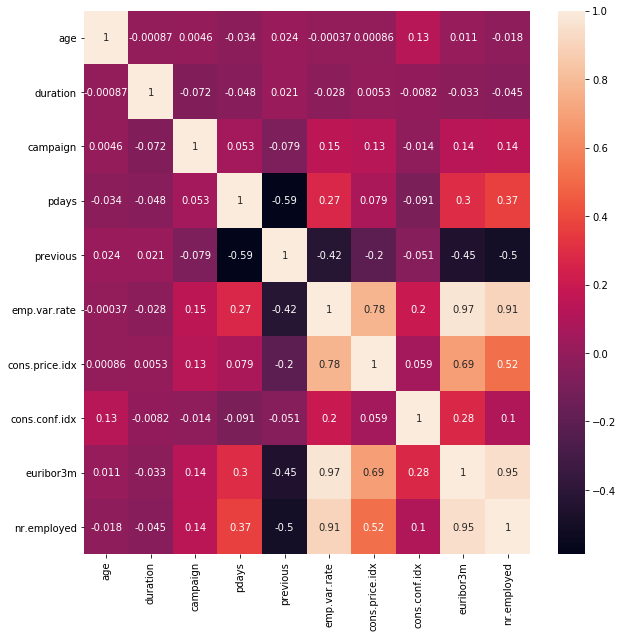


---------------- Histogram ----------------



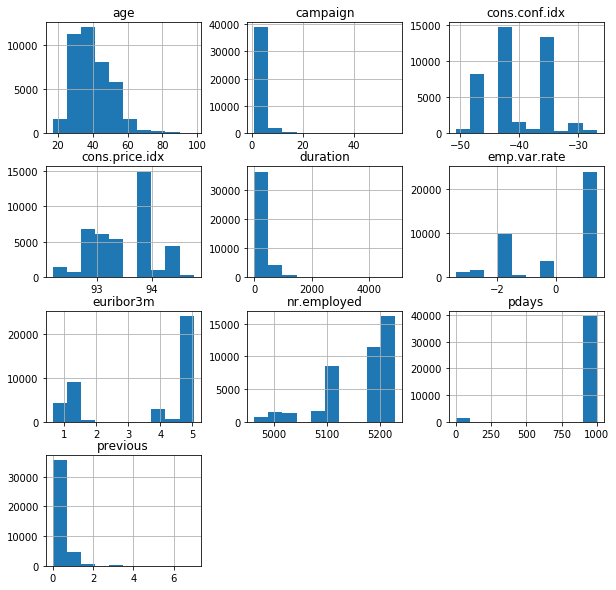


---------------- Boxplot ----------------



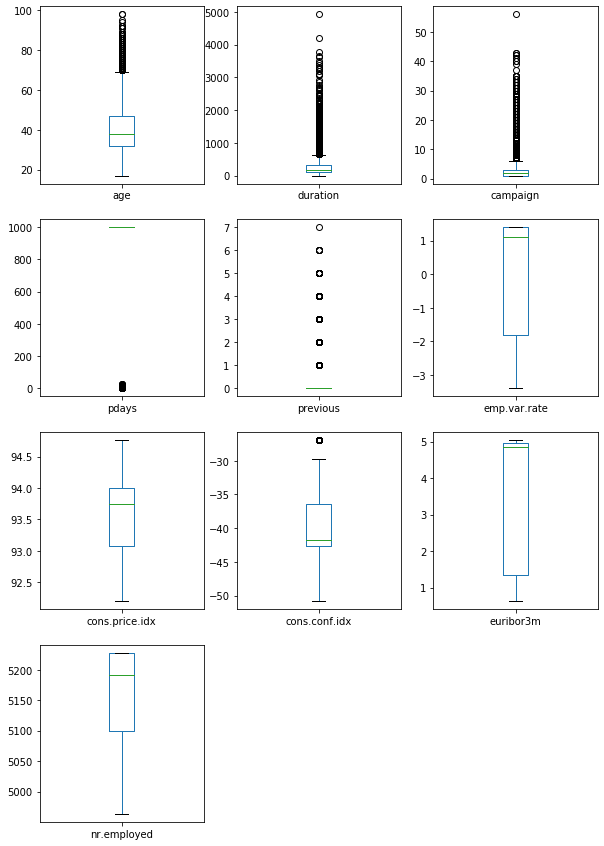


---------------- Count Plot of target feature ----------------



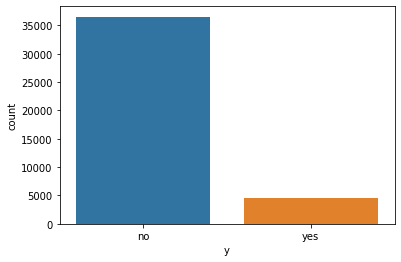


---------------- Count Plot of Education w.r.t target feature ----------------



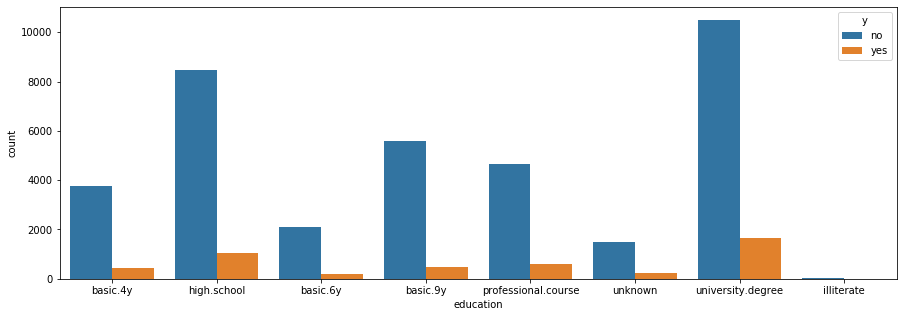


---------------- Count Plot of Housing w.r.t target feature ----------------



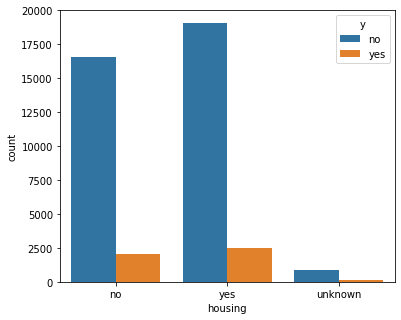


---------------- Count Plot of Job w.r.t target feature ----------------



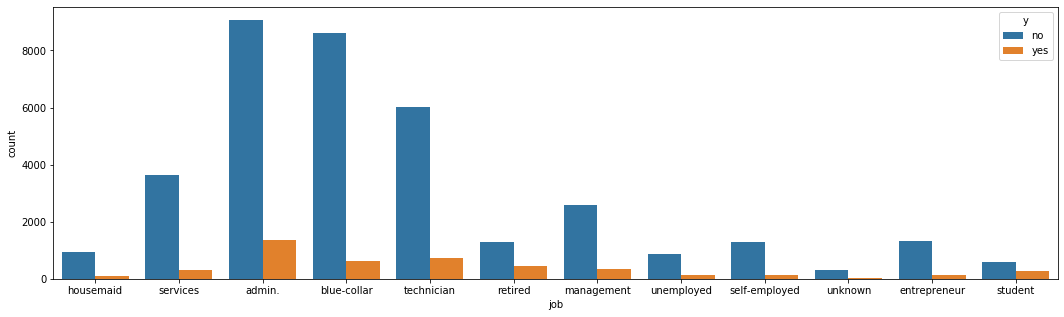


---------------- Count Plot of Loan w.r.t target feature ----------------



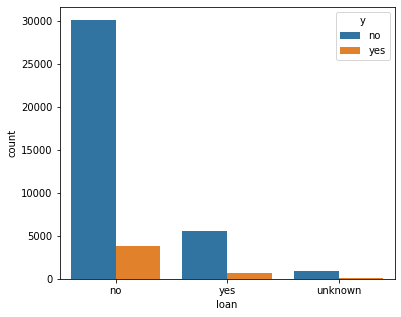


---------------- Count Plot of Contact w.r.t target feature ----------------



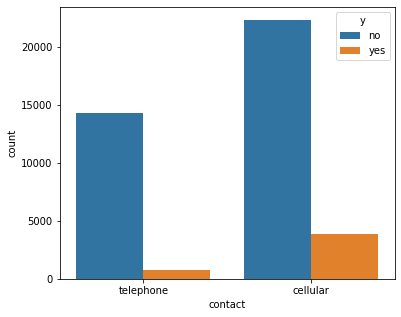




---------------- Applying Classification Algorithms on Only Continous Valued features ----------------


---------------- Data Preprocessing ----------------


Feature selection is done by ANOVA method because features are continues valued and target is categorical valued.


---------------- Top 7 features ----------------

         Features        Score
1        duration  8094.101634
9     nr.employed  5926.610601
3           pdays  4861.173272
8       euribor3m  4309.479048
5    emp.var.rate  4023.829925
4        previous  2304.257088
6  cons.price.idx   778.589795

---------------- Some Value of x for Dataset ----------------

[[ 0.37327189  0.          0.          0.          0.          0.
   0.26659412]
 [-0.14285714  0.          0.          0.          0.          0.
   0.26659412]
 [ 0.21198157  0.          0.          0.          0.          0.
   0.26659412]
 [-0.13364055  0.          0.          0.          0.          0.
   0.26659412]
 [ 0.58525346  0.          0.      

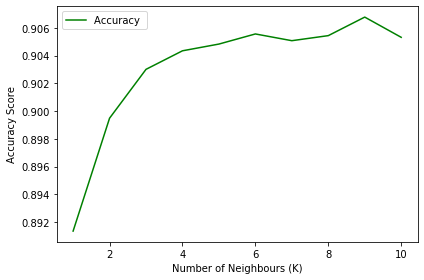


The best accuracy is 0.9067734887108522 with k = 9


---------------- Decision Tree Classifier Algorithm ----------------

------------ HYPERPARAMETER TUNNING ------------

Best Parameter :  {'criterion': 'gini', 'max_depth': 5, 'random_state': 2} with score :  0.9129893778452199

---------- Model with parameter tunning ---------

Model is Ready :
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

Score of the Model is  0.9167223065250379


---------------- ID3 Classifier Algorithm ---------------- 

Model is Ready :
Id3Estimator(gain_ratio=False, is_repeating=False, max_depth=None,
             min_entropy_decrease=0.0,

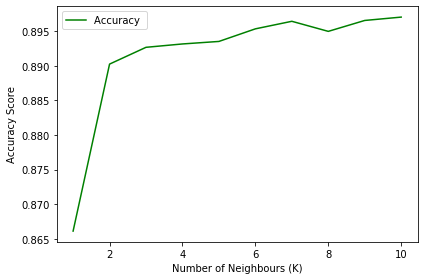


The best accuracy is 0.8970623937848993 with k = 10


---------------- Decision Tree Classifier Algorithm ----------------

------------ HYPERPARAMETER TUNNING ------------

Best Parameter :  {'criterion': 'gini', 'max_depth': 5, 'random_state': 2} with score :  0.8974810318664643

---------- Model with parameter tunning ---------

Model is Ready :
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

Score of the Model is  0.8978755690440061


---------------- ID3 Classifier Algorithm ---------------- 

Model is Ready :
Id3Estimator(gain_ratio=False, is_repeating=False, max_depth=None,
             min_entropy_decrease=0.0

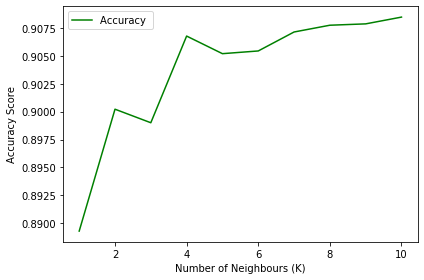


The best accuracy is 0.9084729303228939 with k = 10


---------------- Decision Tree Classifier Algorithm ----------------

------------ HYPERPARAMETER TUNNING ------------

Best Parameter :  {'criterion': 'gini', 'max_depth': 5, 'random_state': 2} with score :  0.9123520485584218

---------- Model with parameter tunning ---------

Model is Ready :
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

Score of the Model is  0.9167223065250379


---------------- ID3 Classifier Algorithm ---------------- 

Model is Ready :
Id3Estimator(gain_ratio=False, is_repeating=False, max_depth=None,
             min_entropy_decrease=0.0

In [36]:
if __name__=="__main__": 
    main()

# Observation

Clearly from the accuracy comparision dataframe using only Category Features does not help in increasing the accuracies of the Modesl nor taking Both together as in all Cases Accuracy Scores remains almost similar to the only continous valued features.

Random Forest and Decision Tree both have accuracy score more than 90%. In which Random Forest has highest accuracy score of 91.76% when both type of features are used. 

Naive Bayes shows most varaition in all cases. It increases when only categorical features are used but again it decreases when both are used together.But it is also noted that maximum accuaracy score of Naive Bayes with categorical feature is 2% less than Random Forest Classifier.



## So, Final Conclusion is to use Random Forest Classifier as it is gives highest accuracy.

# Random Forest Model Finalizing

In [37]:
Data = Import_data()
continous_features , categorical_features = feature_separation(Data.loc[:,Data.columns!='y'])

--------------- Pandas package is used to read the Dataset ---------------
Number of rows are 41188. 
Number of Columns are 21.


In [38]:
categorical_features = Null_value_handler(categorical_features)
categorical_features = Categorical_feature_encoding(categorical_features)
Features = pd.concat([continous_features , categorical_features], axis=1, sort = True)

largest_feature_score_df,x = Data_Preprocessing( Features, Data['y'], f_classif, 10)
y = Categorical_feature_encoding(Data['y'].to_frame())
y = y.values

train_x, test_x , train_y, test_y = Data_split(x,y)

--------------- Missing Values Handled ---------------



In [39]:
RF_class,RFCPred,rfcas = Random_Forest_classifier(train_x,train_y,test_x,test_y)



---------------- Random Forest Algorithm ----------------

------------ HYPERPARAMETER TUNNING ------------

Best Parameter :  {'criterion': 'gini', 'max_depth': 10, 'random_state': 2} with score :  0.9167526555386949

---------- Model with parameter tunning ---------

Model is Ready :
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

Score of the Model is  0.9375417298937785


### Evaluation

**Accuracy Score**

In [47]:
print(f"Accuracy Scaore of Random Forest : {rfcas*100}")

Accuracy Scaore of Random Forest : 91.75770818159748


**Confusion Matrix**

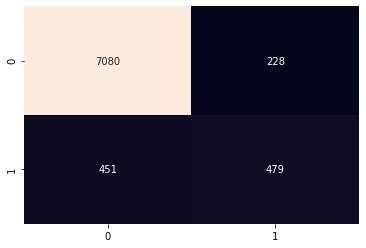

In [48]:
sns.heatmap(confusion_matrix(test_y,RFCPred), annot = True, cbar = False,  fmt = '0.0f' )
plt.show()

**Classification Report of the Model**

In [49]:
print(classification_report(test_y , RFCPred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7308
           1       0.68      0.52      0.59       930

    accuracy                           0.92      8238
   macro avg       0.81      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238

